In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [37]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Fetch BMW stock data from Yahoo Finance
bmw_stock = yf.download('BMW.DE', start='2018-01-01', end='2023-01-01')

# Use the 'Close' prices for prediction
data = bmw_stock.filter(['Close']).values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Create training and testing datasets
seq_length = 60  # Sequence length for LSTM

# Prepare the training data
train_data = scaled_data[:1500]  # 1500 days as training data
x_train, y_train = [], []
for i in range(seq_length, len(train_data)):
    x_train.append(train_data[i - seq_length:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Reshape for LSTM

# Prepare the testing data
test_data = scaled_data[200 - seq_length:]  # Use remaining data as testing data
x_test, y_test = [], []
for i in range(seq_length, len(test_data)):
    x_test.append(test_data[i - seq_length:i, 0])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Reshape for LSTM

[*********************100%%**********************]  1 of 1 completed


In [38]:

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [39]:
# Compile the model with accuracy as a metric
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')



In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=50, batch_size=32,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])



Epoch 1/50
38/38 [==============================] - 15s 228ms/step - loss: 0.0454 - val_loss: 0.0089
Epoch 2/50
38/38 [==============================] - 5s 138ms/step - loss: 0.0090 - val_loss: 0.0044
Epoch 3/50
38/38 [==============================] - 6s 152ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 4/50
38/38 [==============================] - 5s 137ms/step - loss: 0.0062 - val_loss: 0.0034
Epoch 5/50
38/38 [==============================] - 5s 126ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 6/50
38/38 [==============================] - 6s 167ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 7/50
38/38 [==============================] - 5s 119ms/step - loss: 0.0054 - val_loss: 0.0038
Epoch 8/50
38/38 [==============================] - 5s 137ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 9/50
38/38 [==============================] - 8s 208ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 10/50
38/38 [==============================] - 5s 134ms/step - loss: 0.0055 - val_loss: 0.003

In [ ]:
# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f"Loss: {loss}")


In [ ]:
# Make predictions
predictions = model.predict(x_test)

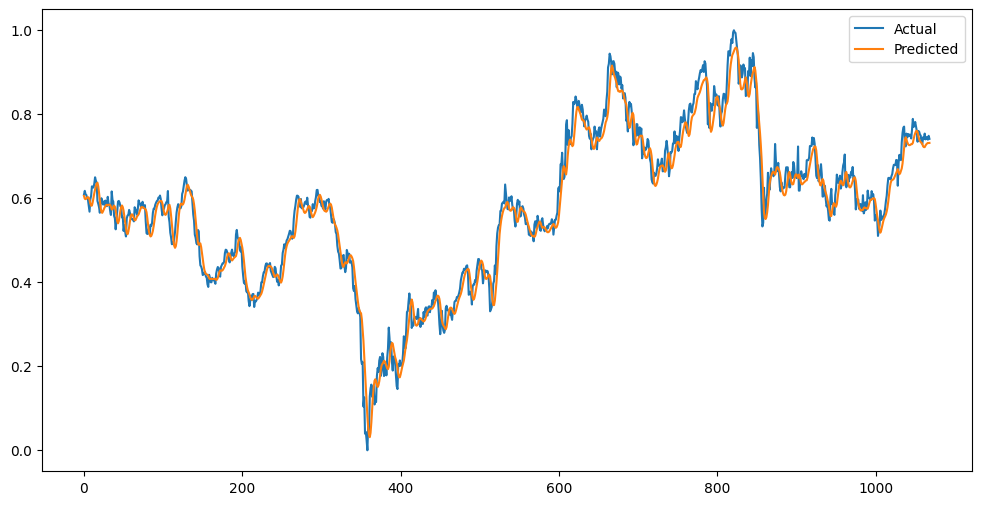

In [44]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()
